In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

northwestern_df = pd.read_excel('./northwestern_data.xlsx')
northwestern_df.head()


,Case ID#,Filed:,Status:,Court:,Gender:,Race:,Ethnicity:,Crime Type:,Count:,Charge Code:,...,Prosecutor Facility:,Prosecutor Sentence Type:,Prosecutor Term Min:,Prosecutor Term Min Unit:,Prosecutor Term Max:,Prosecutor Term Max Unit:,Fine:,Probation:,Probation Term:,Probation Term Unit:
0,\n19-10-160319,2019-10-15 00:00:00,Closed,Northampton District Court,Male,White,Hispanic/Latinx,Assaults,1,265/15B/A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\n19-10-160319,2019-10-15 00:00:00,Closed,Northampton District Court,Male,White,Hispanic/Latinx,Assaults,2,265/13A/B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Probation,2.0,Years
2,0,2008-05-07 00:00:00,Closed,Greenfield District Court,Female,White,NaN,Assaults,1,265/13A/B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,276/87,1.0,Years
3,0,2008-05-07 00:00:00,Closed,Greenfield District Court,Female,White,NaN,Assaults,2,268/32B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00-03-111111,2001-10-17 14:32:14,Closed,DC,Male,NaN,NaN,OUI,1,OP UNDR INFL LIQ,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = northwestern_df[['Count:', "Charge Description:" ,"Crime Type:", "Race:", "Gender:", "Disposition:", "Sentence Type:"]]
# df.drop()
#conversion of string/character values to integers
# Ctype = df['Case Type:'].value_counts().index.tolist()
# i = 0
# for i in range(len(Ctype)):
#   df['Case Type:'].replace(Ctype[i], i, inplace = True)
# df['Case Type:']

crime = df['Crime Type:'].value_counts().index.tolist()
i = 0
for i in range(len(crime)):
  df['Crime Type:'].replace(crime[i], i, inplace = True)

j= 0
race = df['Race:'].value_counts().index.tolist()
for j in range(len(race)):
  df['Race:'].replace(race[j], j, inplace = True)

k= 0
sentence = df['Sentence Type:'].value_counts().index.tolist()
for k in range(len(sentence)):
  df['Sentence Type:'].replace(sentence[k], k, inplace = True)

k= 0
disptype = df['Disposition:'].value_counts().index.tolist()
for k in range(len(disptype)):
  df['Disposition:'].replace(disptype[k], k, inplace = True)

k =0
gender = df['Gender:'].value_counts().index.tolist()
for k in range(len(gender)):
  df['Gender:'].replace(gender[k], k, inplace = True)

# k =0
# desc = df['Disp Desc'].value_counts().index.tolist()
# for k in range(len(desc)):
#   df['Disp Desc'].replace(desc[k], k, inplace = True)



# correlation = df["Race"].corr(df["Case Type"])
# correlation
# df['Race']
df2 = df[['Race:', 'Gender:','Crime Type:', 'Disposition:', 'Sentence Type:']]
corr = df2.corr()
corr
corr.style.background_gradient(cmap='coolwarm')


/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_4918/847649866.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Crime Type:'].replace(crime[i], i, inplace = True)
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_4918/847649866.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Race:'].replace(race[j], j, inplace = True)
/var/folders/ks/vzxfw4ks2qqgpbl6l3n_3mkr0000gn/T/ipykernel_4918/847649866.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Race:,Gender:,Crime Type:,Disposition:,Sentence Type:
Race:,1.000000,-0.008368,-0.002590,0.012544,0.011472
Gender:,-0.008368,1.000000,-0.039532,-0.009664,0.062917
Crime Type:,-0.002590,-0.039532,1.000000,0.065827,0.024632
Disposition:,0.012544,-0.009664,0.065827,1.000000,0.139413
Sentence Type:,0.011472,0.062917,0.024632,0.139413,1.000000


<AxesSubplot: >

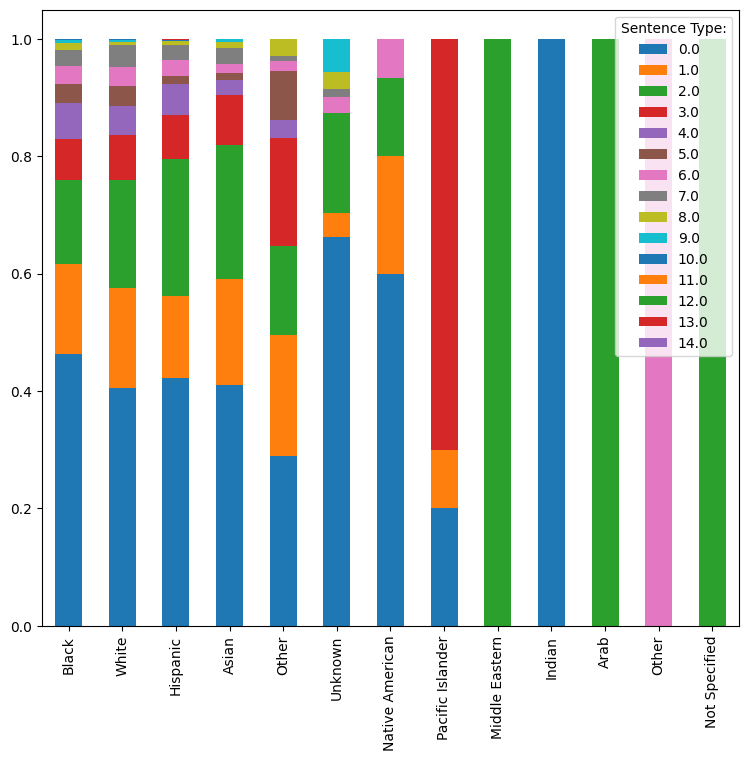

In [13]:
grouped= df2.groupby(['Race:','Sentence Type:']).size().unstack()

grouped = grouped.div(grouped.sum(axis=1), axis=0)
grouped.index = ['Black', 'White', 'Hispanic', 'Asian', 'Other', 'Unknown', 'Native American', 'Pacific Islander', 'Middle Eastern', 'Indian', 'Arab','Other','Not Specified']
grouped.plot(kind = "bar", stacked = True, figsize=(9, 8))
